# Abalone Age Predictor

### Importing Numpy and Pandas module

In [160]:
import numpy as np
import pandas as pd

In [161]:
url_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names = ['sex','lenght','diameter','height','whole','shucked','viscera','shell','rings']
df = pd.read_csv(url_path,header=1, names=names)

In [162]:
df.head

<bound method NDFrame.head of      sex  lenght  diameter  height   whole  shucked  viscera   shell  rings
0      F   0.530     0.420   0.135  0.6770   0.2565   0.1415  0.2100      9
1      M   0.440     0.365   0.125  0.5160   0.2155   0.1140  0.1550     10
2      I   0.330     0.255   0.080  0.2050   0.0895   0.0395  0.0550      7
3      I   0.425     0.300   0.095  0.3515   0.1410   0.0775  0.1200      8
4      F   0.530     0.415   0.150  0.7775   0.2370   0.1415  0.3300     20
...   ..     ...       ...     ...     ...      ...      ...     ...    ...
4170   F   0.565     0.450   0.165  0.8870   0.3700   0.2390  0.2490     11
4171   M   0.590     0.440   0.135  0.9660   0.4390   0.2145  0.2605     10
4172   M   0.600     0.475   0.205  1.1760   0.5255   0.2875  0.3080      9
4173   F   0.625     0.485   0.150  1.0945   0.5310   0.2610  0.2960     10
4174   M   0.710     0.555   0.195  1.9485   0.9455   0.3765  0.4950     12

[4175 rows x 9 columns]>

In [163]:
df.describe

<bound method NDFrame.describe of      sex  lenght  diameter  height   whole  shucked  viscera   shell  rings
0      F   0.530     0.420   0.135  0.6770   0.2565   0.1415  0.2100      9
1      M   0.440     0.365   0.125  0.5160   0.2155   0.1140  0.1550     10
2      I   0.330     0.255   0.080  0.2050   0.0895   0.0395  0.0550      7
3      I   0.425     0.300   0.095  0.3515   0.1410   0.0775  0.1200      8
4      F   0.530     0.415   0.150  0.7775   0.2370   0.1415  0.3300     20
...   ..     ...       ...     ...     ...      ...      ...     ...    ...
4170   F   0.565     0.450   0.165  0.8870   0.3700   0.2390  0.2490     11
4171   M   0.590     0.440   0.135  0.9660   0.4390   0.2145  0.2605     10
4172   M   0.600     0.475   0.205  1.1760   0.5255   0.2875  0.3080      9
4173   F   0.625     0.485   0.150  1.0945   0.5310   0.2610  0.2960     10
4174   M   0.710     0.555   0.195  1.9485   0.9455   0.3765  0.4950     12

[4175 rows x 9 columns]>

### Data Cleaning

#### Handling categorical values

 - The feature 'sex' has three categoricals values i.e., "M" for male, "F" for female, "I" for infants.
 - So  lets replace each categorical value with "0", "1", "2".

In [164]:
df['sex'].replace({'M': 0, 'F': 1, 'I': 2}, inplace=True)

Replacing the null values with the mean of that column

In [165]:
df = df.fillna(df.mean())

### Data Visualization

#### Importing required modules

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data = pd.read_csv(url_path,header=1, names=names)

Checking number of abalones with different values for the feature 'sex'.

In [168]:
data['sex'].value_counts()

M    1526
I    1342
F    1307
Name: sex, dtype: int64

<AxesSubplot: ylabel='sex'>

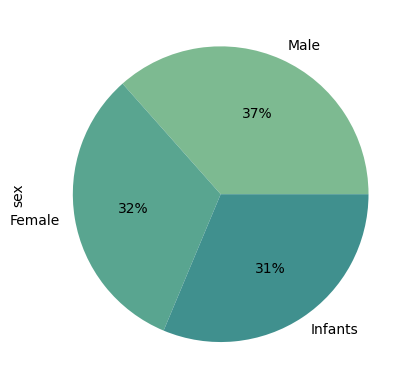

In [169]:
df['sex'].value_counts().plot.pie(autopct = "%1.0f%%", labels=["Male", "Female", "Infants"], startangle = 0, colors = sns.color_palette("crest"))

<AxesSubplot: xlabel='rings', ylabel='Count'>

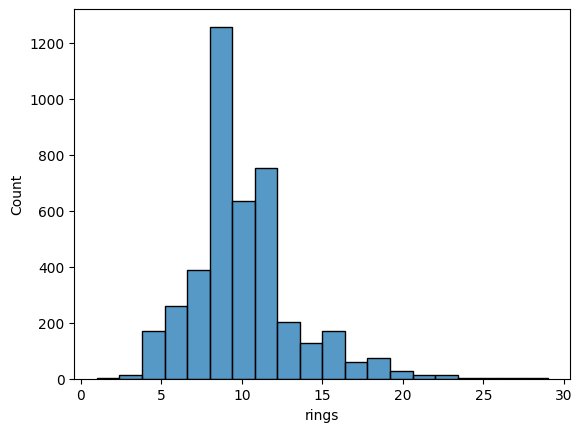

In [186]:
# histogram representing the count of abalone for particular age(rings)

sns.histplot(df['rings'],bins=20)

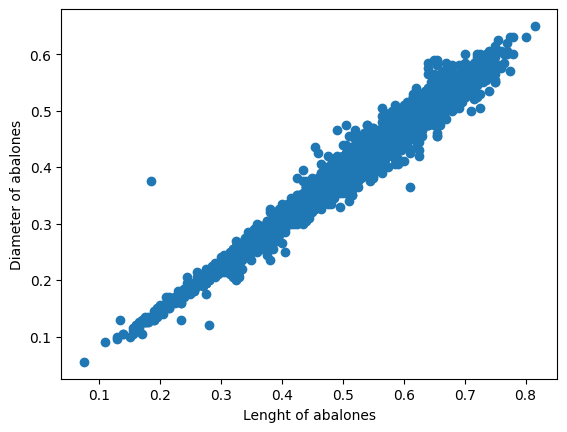

In [170]:
# scatter plot for the observing the relation between lenght and diameter of abalones

plt.scatter(df['lenght'], df['diameter'])
plt.xlabel('Lenght of abalones')
plt.ylabel('Diameter of abalones')
plt.show()

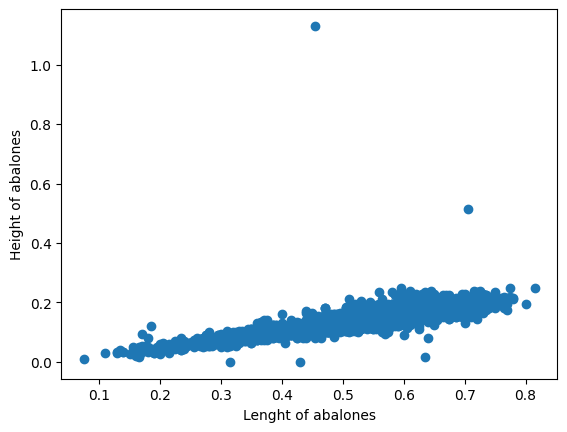

In [171]:
# scatter plot for the observing the relation between lenght and height of abalones

plt.scatter(df['lenght'], df['height'])
plt.xlabel('Lenght of abalones')
plt.ylabel('Height of abalones')
plt.show()

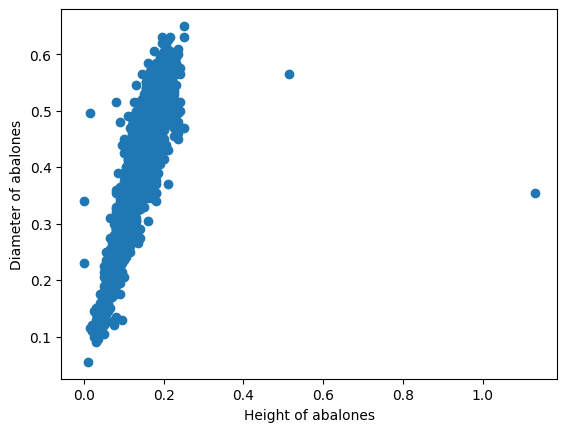

In [172]:
# scatter plot for the observing the relation between height and diameter of abalones

plt.scatter(df['height'], df['diameter'])
plt.xlabel('Height of abalones')
plt.ylabel('Diameter of abalones')
plt.show()

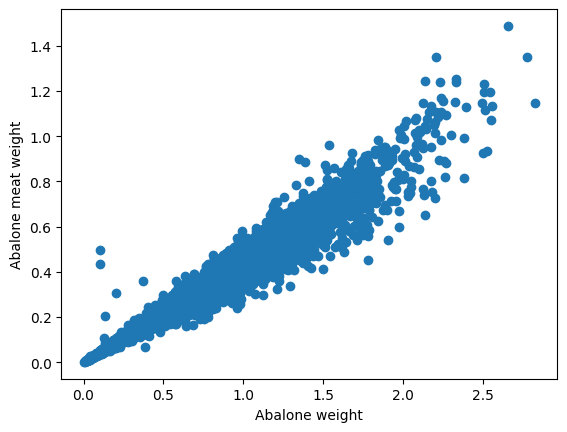

In [173]:
# scatter plot for the observing the relation between whole(enitre weight of abalone) and shucked(weight of meat in abalone) of abalones

plt.scatter(df['whole'], df['shucked'])
plt.xlabel('Abalone weight')
plt.ylabel('Abalone meat weight')
plt.show()

The model needs to predict the age of abalone. The age of abalone is represented by "Rings" feature.

In [174]:
x = df.drop('rings', 1)
y = df['rings']

C:\Users\Kaushik\AppData\Local\Temp\ipykernel_21336\1555779438.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop('rings', 1)


In [175]:
print(x)
print(x.shape)

      sex  lenght  diameter  height   whole  shucked  viscera   shell
0       1   0.530     0.420   0.135  0.6770   0.2565   0.1415  0.2100
1       0   0.440     0.365   0.125  0.5160   0.2155   0.1140  0.1550
2       2   0.330     0.255   0.080  0.2050   0.0895   0.0395  0.0550
3       2   0.425     0.300   0.095  0.3515   0.1410   0.0775  0.1200
4       1   0.530     0.415   0.150  0.7775   0.2370   0.1415  0.3300
...   ...     ...       ...     ...     ...      ...      ...     ...
4170    1   0.565     0.450   0.165  0.8870   0.3700   0.2390  0.2490
4171    0   0.590     0.440   0.135  0.9660   0.4390   0.2145  0.2605
4172    0   0.600     0.475   0.205  1.1760   0.5255   0.2875  0.3080
4173    1   0.625     0.485   0.150  1.0945   0.5310   0.2610  0.2960
4174    0   0.710     0.555   0.195  1.9485   0.9455   0.3765  0.4950

[4175 rows x 8 columns]
(4175, 8)


In [176]:
print(y)
print(y.shape)

0        9
1       10
2        7
3        8
4       20
        ..
4170    11
4171    10
4172     9
4173    10
4174    12
Name: rings, Length: 4175, dtype: int64
(4175,)


Splitting the dataset into Training and Testing set

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [178]:
X_train.shape

(3757, 8)

### Data Preprocessing

In [179]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [180]:
X_train

array([[ 0.05437277,  0.63112105,  0.67551085, ...,  1.327346  ,
        -0.10373102,  0.57942314],
       [ 0.05437277,  1.04827096,  1.1807253 , ...,  1.3002266 ,
         0.61770584,  0.43636651],
       [-1.15437574, -1.57977346, -1.74951851, ..., -1.32583495,
        -1.33656616, -1.39118193],
       ...,
       [ 0.05437277,  0.63112105,  0.52394652, ...,  0.30584873,
         0.2158929 ,  0.43279009],
       [ 0.05437277,  0.88141099,  0.87759663, ...,  1.35446539,
         1.41676565,  1.00501661],
       [ 1.26312128, -0.87061861, -0.8401325 , ..., -1.03882134,
        -1.07173491, -0.9977762 ]])

Trying various regressors for checking which regressor is performing better.

In [181]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


# Defining regressors
regressors = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Support Vector Machine', SVR())
]

for name, reg in regressors:
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    # Evaluating the regressor using MSE and R-squared (R2) score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} Regressor:')
    print(f'Mean Squared Error: {mse:.3f}')
    print(f'R-squared (R2) Score: {r2:.3f}\n')


Decision Tree Regressor:
Mean Squared Error: 8.641
R-squared (R2) Score: 0.138

K-Nearest Neighbors Regressor:
Mean Squared Error: 5.384
R-squared (R2) Score: 0.463

Linear Regression Regressor:
Mean Squared Error: 5.211
R-squared (R2) Score: 0.480

Ridge Regression Regressor:
Mean Squared Error: 5.208
R-squared (R2) Score: 0.480

Lasso Regression Regressor:
Mean Squared Error: 7.284
R-squared (R2) Score: 0.273



Support Vector Machine Regressor:
Mean Squared Error: 5.111
R-squared (R2) Score: 0.490



As we can see Support Vector Machine Regressor has better(less) mean squared error compared to other regressor. So, we can use the SVM regressor.

Let's use the Support Vector Machine Regressor.

In [182]:
# Initializing the SVR regressor
svr = SVR()

# Training the SVR regressor
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

In [183]:
y_pred

array([ 8.24616681, 11.04100857,  9.57085204,  7.39414322,  7.95692229,
       10.75933907,  7.67493107,  9.85030845, 12.05159611,  7.82816744,
       10.24935288,  9.93864482,  8.3451497 ,  9.25837275,  7.23042282,
       10.30921051, 10.40275889,  5.84077019,  6.40241847, 10.86655584,
       10.03420631, 11.85272945, 10.63217891,  7.01077975,  9.0920403 ,
       10.81629781, 12.07874493,  9.12417866,  7.06718249,  7.57590628,
       11.04887366, 10.20040529, 13.05673052, 12.54577635,  6.69316467,
        8.4174527 ,  8.84933453,  8.73387248,  5.76818319,  8.06674523,
       10.8604563 ,  7.72701332, 10.28478068,  4.27651768,  5.05908027,
        9.06152949, 12.00882153, 10.80975054,  6.18495735,  8.87939668,
       12.07008631, 10.46162651,  6.576006  , 10.5345634 ,  9.28771824,
        8.43004896,  8.05895778, 10.00804768,  9.46654154,  7.96912018,
       10.00663818, 10.04982746,  9.78603215,  7.75825635, 10.42232764,
        7.12293504,  6.20604189, 10.75264553, 13.70624698, 10.47

In [184]:
mse = mean_squared_error(y_test, y_pred)
print(f'Support Vector Machine Regressor:')
print(f'Mean Squared Error: {mse:.3f}\n')

Support Vector Machine Regressor:
Mean Squared Error: 5.111



In [185]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2:.3f}\n')

R-squared (R2) Score: 0.490

